In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [2]:
#Loading the Dataset

df = pd.read_csv("/Users/favourjames/Downloads/DATA SCIENCE AND MACHINE LEARNING/datathon23/FraudDetectionDataset.csv")

In [3]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [3]:
df.shape

(6000000, 32)

In [4]:
df.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [5]:
df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [4]:
obj_col = df.select_dtypes(include='object').columns

In [5]:
#checking for missing or empty strings

for col in obj_col:
    # Check for missing or empty string values in the current object datatype column
    missing_values = df[df[col].str.strip().eq('')]

    # Display the rows with missing or empty string values in the current column
    if not missing_values.empty:
        print("Rows with missing or empty string values in the '{}' column:".format(col))
        print(missing_values)

No Missing strings were found

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

# Data Visualisations

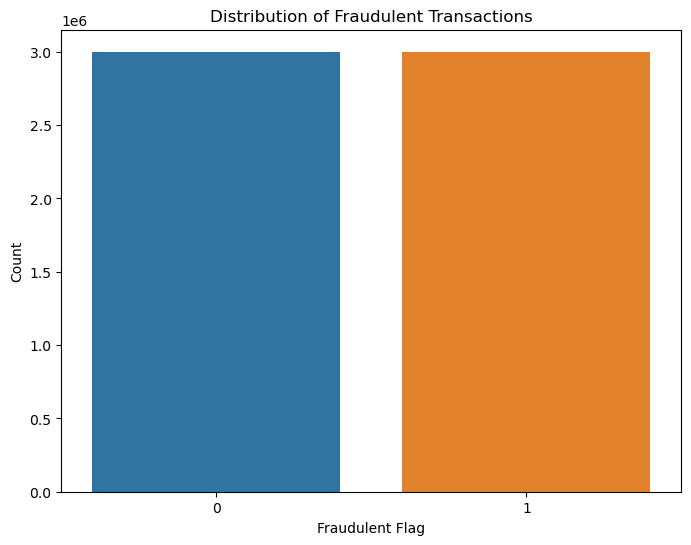

In [13]:
# Plot the distribution of the target variable

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Fraudulent Flag')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent Flag')
plt.ylabel('Count')
plt.show()

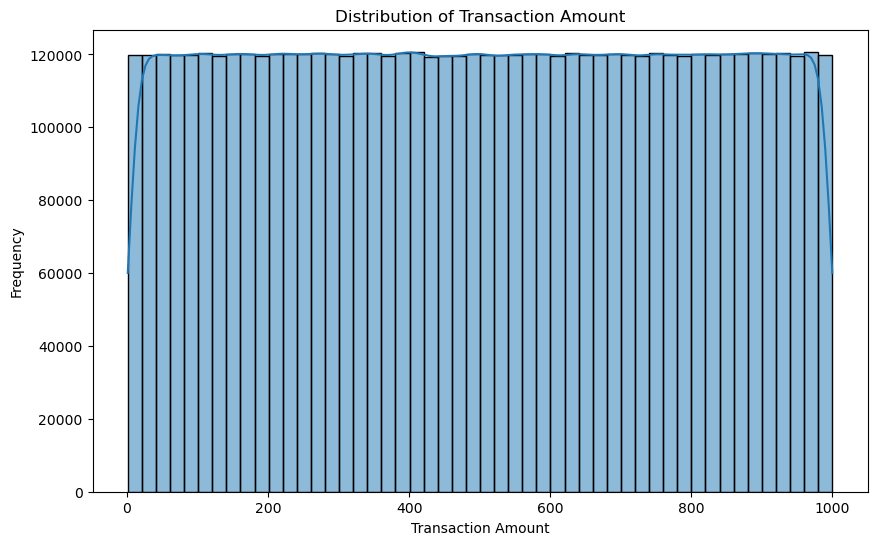

In [14]:
#transaction amount distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Transaction Amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

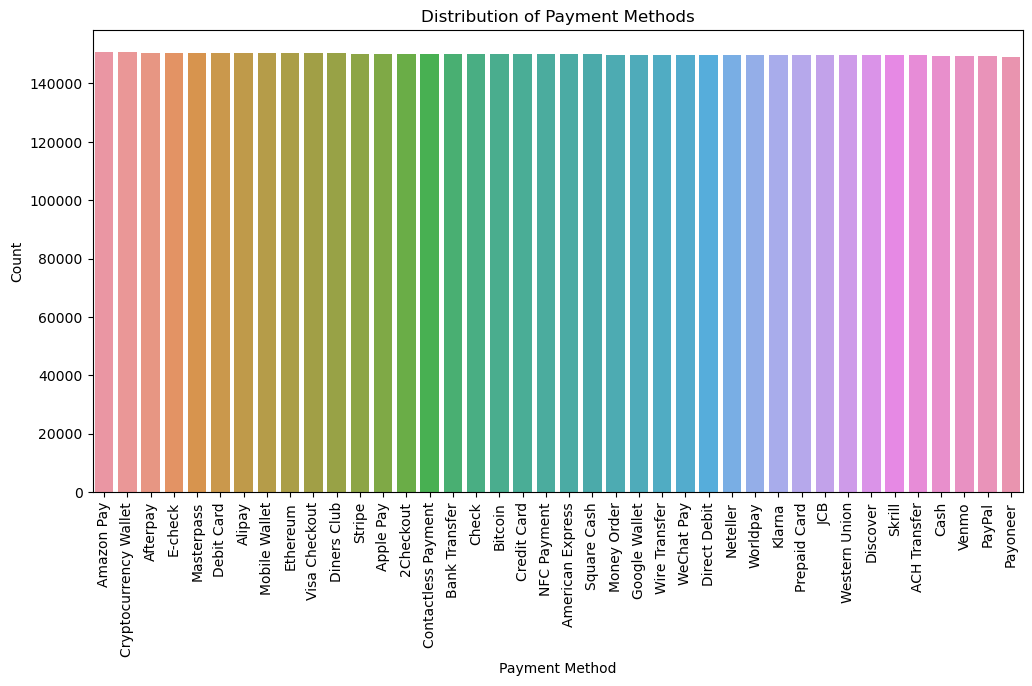

In [15]:
# Exploring the distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

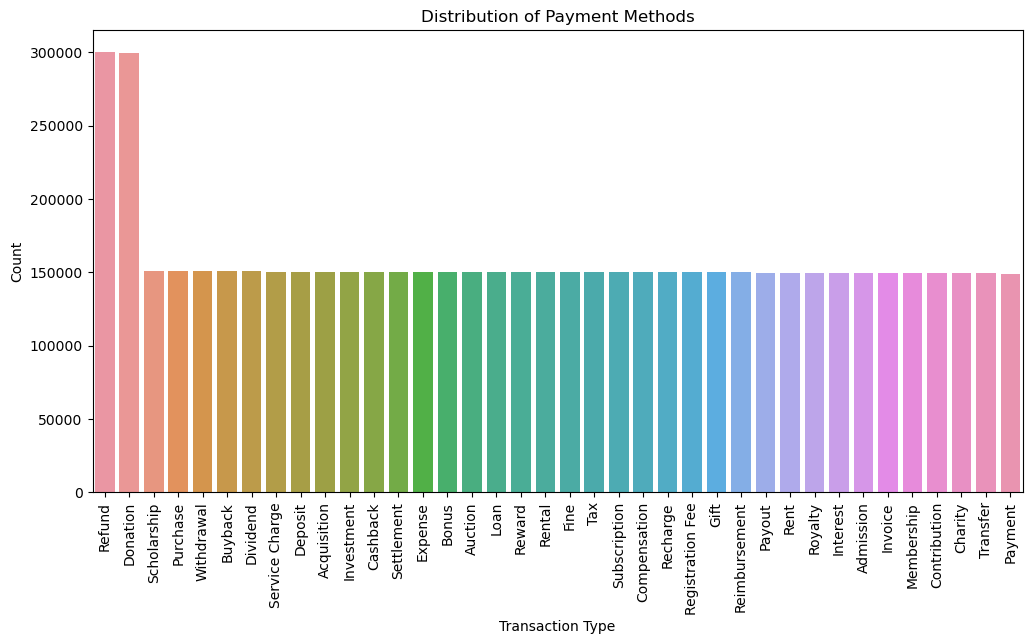

In [16]:
#Comparing Payment methods with transaction type

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Transaction Type', order=df['Transaction Type'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/var/folders/h4/d4lyctqd5pb73bwnx4fqxj5h0000gn/T/ipykernel_76918/4083611200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


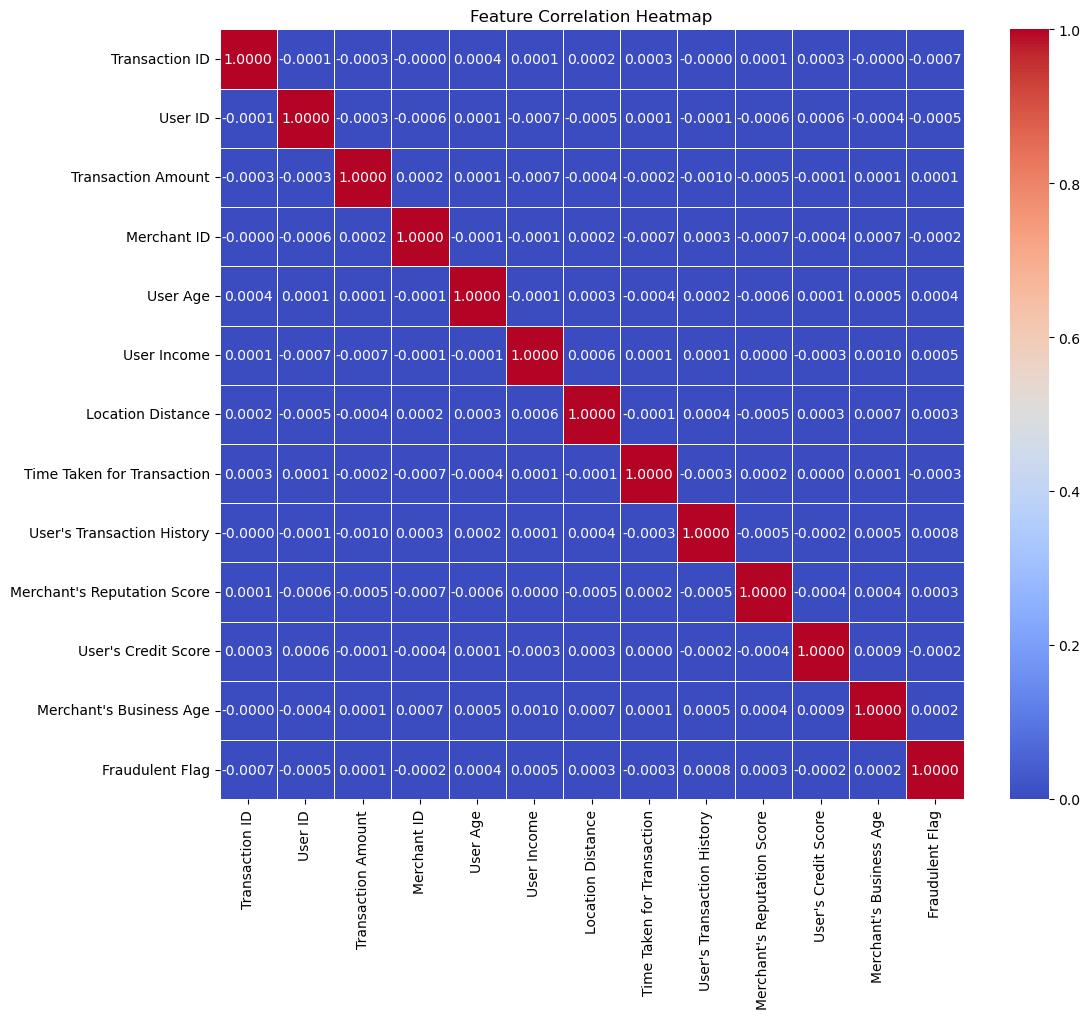

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

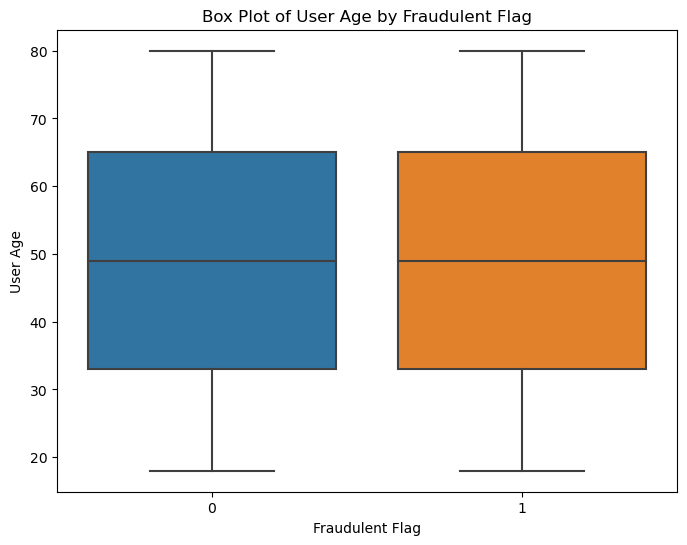

In [18]:
#Boxplot to view relationship between variables

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Fraudulent Flag', y='User Age')
plt.title('Box Plot of User Age by Fraudulent Flag')
plt.xlabel('Fraudulent Flag')
plt.ylabel('User Age')
plt.show()

# Feature Engineering

In [5]:
# Count unique IP addresses per user
unique_ip_per_user = df.groupby('User ID')['IP Address'].nunique()

# Merge the counts back into the original DataFrame
df = df.merge(unique_ip_per_user, on='User ID', how='left')
df.rename(columns={'IP Address_y': 'Unique IP Count per User'}, inplace=True)

In [6]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address_x,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,624
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,698
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,678
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,652
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,701


In [7]:
# Convert 'Transaction Date and Time' to datetime
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Extract date and time features
df['Transaction Day'] = df['Transaction Date and Time'].dt.day
df['Transaction Hour'] = df['Transaction Date and Time'].dt.hour
# df['Transaction Day of Week'] = df['Transaction Date and Time'].dt.dayofweek  

Dropped day of week because it did not contribute much to the model and this was seen by doing feature importance

In [8]:
new_data = df.drop(columns=['Transaction Date and Time'], axis=1)

In [9]:
obj_ = new_data.select_dtypes(include='object')

In [10]:
obj_.nunique()

Payment Method                            40
Country Code                              40
Transaction Type                          38
Device Type                               38
IP Address_x                         5995699
Browser Type                              39
Operating System                          40
Merchant Category                         40
User Occupation                           26
User Gender                                7
User Account Status                       18
Transaction Status                        40
Transaction Time of Day                    3
User's Device Location                    40
Transaction Currency                      40
Transaction Purpose                       38
User's Email Domain                       40
Transaction Authentication Method         39
dtype: int64

In [11]:
obj_col = obj_.columns

In [12]:
obj_col = obj_col.drop('IP Address_x') #to be encoded using a different method

In [13]:
obj_col = obj_col.drop("User's Email Domain") #to be encoded using a different method

In [14]:
new_data.head()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address_x,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User,Transaction Day,Transaction Hour
0,51595306,9822,163.08,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,624,2,7
1,85052974,4698,430.74,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,698,12,15
2,23954324,8666,415.74,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,678,12,17
3,44108303,9012,565.89,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,652,27,11
4,66622683,5185,955.49,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,701,24,4


## Encoding Categorical Columns by using Frequency Encoding

In [15]:
# List of columns to perform frequency encoding on
columns_to_encode = [
    'Payment Method', 'Country Code', 'Transaction Type', 'Device Type',
    'Browser Type', 'Operating System', 'Merchant Category', 'User Occupation',
    'User Account Status', 'Transaction Status',
    "User's Device Location", 'Transaction Currency', 'Transaction Purpose',
    'Transaction Authentication Method'
]

# Loop through each column and perform frequency encoding
for column in columns_to_encode:
    frequency_map = new_data[column].value_counts(normalize=True).to_dict()
    new_data[column + '_Encoded'] = new_data[column].map(frequency_map)

In [16]:
new_data.head()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address_x,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User,Transaction Day,Transaction Hour,Payment Method_Encoded,Country Code_Encoded,Transaction Type_Encoded,Device Type_Encoded,Browser Type_Encoded,Operating System_Encoded,Merchant Category_Encoded,User Occupation_Encoded,User Account Status_Encoded,Transaction Status_Encoded,User's Device Location_Encoded,Transaction Currency_Encoded,Transaction Purpose_Encoded,Transaction Authentication Method_Encoded
0,51595306,9822,163.08,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,624,2,7,0.024931,0.024968,0.024896,0.026359,0.025069,0.025033,0.024938,0.038353,0.055382,0.024973,0.024875,0.024958,0.026320,0.025517
1,85052974,4698,430.74,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,698,12,15,0.025019,0.025091,0.025039,0.026287,0.024941,0.025040,0.024938,0.038452,0.055639,0.024902,0.024995,0.025087,0.026285,0.025665
2,23954324,8666,415.74,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,678,12,17,0.024984,0.025019,0.025015,0.026292,0.025025,0.025077,0.025062,0.038498,0.055382,0.025015,0.024997,0.025118,0.026254,0.025639
3,44108303,9012,565.89,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,652,27,11,0.025014,0.025021,0.025132,0.026372,0.025078,0.025021,0.024980,0.038498,0.055472,0.025012,0.025068,0.025096,0.026229,0.025606
4,66622683,5185,955.49,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,701,24,4,0.024960,0.025153,0.025059,0.026282,0.025017,0.024960,0.025097,0.038383,0.055455,0.025021,0.024874,0.025002,0.026398,0.025604


## Encoding with Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
for column in obj_col:
    new_data[column] = le.fit_transform(new_data[column])

In [19]:
new_data.head()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address_x,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User,Transaction Day,Transaction Hour,Payment Method_Encoded,Country Code_Encoded,Transaction Type_Encoded,Device Type_Encoded,Browser Type_Encoded,Operating System_Encoded,Merchant Category_Encoded,User Occupation_Encoded,User Account Status_Encoded,Transaction Status_Encoded,User's Device Location_Encoded,Transaction Currency_Encoded,Transaction Purpose_Encoded,Transaction Authentication Method_Encoded
0,51595306,9822,163.08,4044,1,19,6,10,42.23.223.120,15,27,22,68,7,66826.21,6,11,19,9.34,24.22,0,26,2.71,37,24,9,343,cox.co.uk,3,5,0,624,2,7,0.024931,0.024968,0.024896,0.026359,0.025069,0.025033,0.024938,0.038353,0.055382,0.024973,0.024875,0.024958,0.026320,0.025517
1,85052974,4698,430.74,4576,0,38,5,18,39.52.212.120,2,33,4,22,5,89356.71,2,9,32,65.28,55.11,0,60,3.95,18,11,6,688,gmail.com,13,18,1,698,12,15,0.025019,0.025091,0.025039,0.026287,0.024941,0.025040,0.024938,0.038452,0.055639,0.024902,0.024995,0.025087,0.026285,0.025665
2,23954324,8666,415.74,4629,20,21,29,34,243.180.236.29,21,1,29,71,16,58438.63,3,11,26,44.05,53.84,0,81,3.81,24,22,0,371,rocketmail.com,7,33,1,678,12,17,0.024984,0.025019,0.025015,0.026292,0.025025,0.025077,0.025062,0.038498,0.055382,0.025015,0.024997,0.025118,0.026254,0.025639
3,44108303,9012,565.89,3322,10,30,22,16,212.186.227.14,14,6,0,78,16,3426.92,0,10,6,21.70,21.62,0,18,2.67,30,6,20,687,roadrunner.co.uk,15,32,1,652,27,11,0.025014,0.025021,0.025132,0.026372,0.025078,0.025021,0.024980,0.038498,0.055472,0.025012,0.025068,0.025096,0.026229,0.025606
4,66622683,5185,955.49,7609,39,13,0,27,166.113.10.199,1,28,23,31,17,53080.12,3,3,30,56.63,53.71,0,98,3.19,14,31,11,605,protonmail.co.uk,17,21,1,701,24,4,0.024960,0.025153,0.025059,0.026282,0.025017,0.024960,0.025097,0.038383,0.055455,0.025021,0.024874,0.025002,0.026398,0.025604


In [20]:
new_data.shape

(6000000, 48)

In [21]:
#Feature 1: Email Domain Frequency, this is to calculate the occurence of an email domain

new_data['Email Domain'] = new_data["User's Email Domain"].str.split('.').str[0]
category_counts = new_data['Email Domain'].value_counts()
new_data['Email Domain Frequency'] = new_data['Email Domain'].map(category_counts)

In [22]:
new_data.head()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address_x,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User,Transaction Day,Transaction Hour,Payment Method_Encoded,Country Code_Encoded,Transaction Type_Encoded,Device Type_Encoded,Browser Type_Encoded,Operating System_Encoded,Merchant Category_Encoded,User Occupation_Encoded,User Account Status_Encoded,Transaction Status_Encoded,User's Device Location_Encoded,Transaction Currency_Encoded,Transaction Purpose_Encoded,Transaction Authentication Method_Encoded,Email Domain,Email Domain Frequency
0,51595306,9822,163.08,4044,1,19,6,10,42.23.223.120,15,27,22,68,7,66826.21,6,11,19,9.34,24.22,0,26,2.71,37,24,9,343,cox.co.uk,3,5,0,624,2,7,0.024931,0.024968,0.024896,0.026359,0.025069,0.025033,0.024938,0.038353,0.055382,0.024973,0.024875,0.024958,0.026320,0.025517,cox,300321
1,85052974,4698,430.74,4576,0,38,5,18,39.52.212.120,2,33,4,22,5,89356.71,2,9,32,65.28,55.11,0,60,3.95,18,11,6,688,gmail.com,13,18,1,698,12,15,0.025019,0.025091,0.025039,0.026287,0.024941,0.025040,0.024938,0.038452,0.055639,0.024902,0.024995,0.025087,0.026285,0.025665,gmail,599591
2,23954324,8666,415.74,4629,20,21,29,34,243.180.236.29,21,1,29,71,16,58438.63,3,11,26,44.05,53.84,0,81,3.81,24,22,0,371,rocketmail.com,7,33,1,678,12,17,0.024984,0.025019,0.025015,0.026292,0.025025,0.025077,0.025062,0.038498,0.055382,0.025015,0.024997,0.025118,0.026254,0.025639,rocketmail,300183
3,44108303,9012,565.89,3322,10,30,22,16,212.186.227.14,14,6,0,78,16,3426.92,0,10,6,21.70,21.62,0,18,2.67,30,6,20,687,roadrunner.co.uk,15,32,1,652,27,11,0.025014,0.025021,0.025132,0.026372,0.025078,0.025021,0.024980,0.038498,0.055472,0.025012,0.025068,0.025096,0.026229,0.025606,roadrunner,300117
4,66622683,5185,955.49,7609,39,13,0,27,166.113.10.199,1,28,23,31,17,53080.12,3,3,30,56.63,53.71,0,98,3.19,14,31,11,605,protonmail.co.uk,17,21,1,701,24,4,0.024960,0.025153,0.025059,0.026282,0.025017,0.024960,0.025097,0.038383,0.055455,0.025021,0.024874,0.025002,0.026398,0.025604,protonmail,300451


In [23]:
# Feature 2: Transaction Velocity (Transaction performed by user per Day)
new_data['transaction_velocity'] = new_data.groupby('User ID')['Transaction ID'].transform('count') / df['Time Taken for Transaction']


# Feature 3: User's Transaction History (Number of Past Frauds)
user_fraud_history = new_data[new_data['Fraudulent Flag'] == 1].groupby('User ID')['Transaction ID'].count()
user_fraud_history = user_fraud_history.rename('Fraudulent Transactions').reset_index()

# Feature 4: User's Credit Score vs. User Income
new_data['Credit Score to Income Ratio'] = new_data["User's Credit Score"] / new_data["User Income"]

# Feature 5: Transaction Frequency with Specific Merchants
user_merchant_transaction_count = new_data.groupby(['User ID', 'Merchant ID'])['Transaction ID'].count()
user_merchant_transaction_frequency = user_merchant_transaction_count.groupby('User ID').mean().reset_index()
user_merchant_transaction_frequency.rename(columns={'Transaction ID': 'Avg Transactions per Merchant'}, inplace=True)

In [24]:
# Merge the new features back into the original DataFrame
new_data = new_data.merge(user_fraud_history, on='User ID', how='left')
new_data = new_data.merge(user_merchant_transaction_frequency, on='User ID', how='left')

In [25]:
new_data.head()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address_x,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User,Transaction Day,Transaction Hour,Payment Method_Encoded,Country Code_Encoded,Transaction Type_Encoded,Device Type_Encoded,Browser Type_Encoded,Operating System_Encoded,Merchant Category_Encoded,User Occupation_Encoded,User Account Status_Encoded,Transaction Status_Encoded,User's Device Location_Encoded,Transaction Currency_Encoded,Transaction Purpose_Encoded,Transaction Authentication Method_Encoded,Email Domain,Email Domain Frequency,transaction_velocity,Credit Score to Income Ratio,Fraudulent Transactions,Avg Transactions per Merchant
0,51595306,9822,163.08,4044,1,19,6,10,42.23.223.120,15,27,22,68,7,66826.21,6,11,19,9.34,24.22,0,26,2.71,37,24,9,343,cox.co.uk,3,5,0,624,2,7,0.024931,0.024968,0.024896,0.026359,0.025069,0.025033,0.024938,0.038353,0.055382,0.024973,0.024875,0.024958,0.026320,0.025517,cox,300321,25.763832,0.005133,312,1.043478
1,85052974,4698,430.74,4576,0,38,5,18,39.52.212.120,2,33,4,22,5,89356.71,2,9,32,65.28,55.11,0,60,3.95,18,11,6,688,gmail.com,13,18,1,698,12,15,0.025019,0.025091,0.025039,0.026287,0.024941,0.025040,0.024938,0.038452,0.055639,0.024902,0.024995,0.025087,0.026285,0.025665,gmail,599591,12.665578,0.007699,322,1.032544
2,23954324,8666,415.74,4629,20,21,29,34,243.180.236.29,21,1,29,71,16,58438.63,3,11,26,44.05,53.84,0,81,3.81,24,22,0,371,rocketmail.com,7,33,1,678,12,17,0.024984,0.025019,0.025015,0.026292,0.025025,0.025077,0.025062,0.038498,0.055382,0.025015,0.024997,0.025118,0.026254,0.025639,rocketmail,300183,12.592868,0.006349,355,1.043077
3,44108303,9012,565.89,3322,10,30,22,16,212.186.227.14,14,6,0,78,16,3426.92,0,10,6,21.70,21.62,0,18,2.67,30,6,20,687,roadrunner.co.uk,15,32,1,652,27,11,0.025014,0.025021,0.025132,0.026372,0.025078,0.025021,0.024980,0.038498,0.055472,0.025012,0.025068,0.025096,0.026229,0.025606,roadrunner,300117,30.157262,0.200472,324,1.028391
4,66622683,5185,955.49,7609,39,13,0,27,166.113.10.199,1,28,23,31,17,53080.12,3,3,30,56.63,53.71,0,98,3.19,14,31,11,605,protonmail.co.uk,17,21,1,701,24,4,0.024960,0.025153,0.025059,0.026282,0.025017,0.024960,0.025097,0.038383,0.055455,0.025021,0.024874,0.025002,0.026398,0.025604,protonmail,300451,13.051573,0.011398,336,1.023358


In [26]:
new_data.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Unique IP Count per User,Transaction Day,Transaction Hour,Payment Method_Encoded,Country Code_Encoded,Transaction Type_Encoded,Device Type_Encoded,Browser Type_Encoded,Operating System_Encoded,Merchant Category_Encoded,User Occupation_Encoded,User Account Status_Encoded,Transaction Status_Encoded,User's Device Location_Encoded,Transaction Currency_Encoded,Transaction Purpose_Encoded,Transaction Authentication Method_Encoded,Email Domain Frequency,transaction_velocity,Credit Score to Income Ratio,Fraudulent Transactions,Avg Transactions per Merchant
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,1.948900e+01,1.949726e+01,1.845104e+01,1.849636e+01,1.912676e+01,1.949709e+01,1.949513e+01,4.900159e+01,1.250211e+01,5.049328e+04,3.000602e+00,8.503393e+00,1.950520e+01,5.050600e+01,3.049492e+01,1.000431e+00,5.048393e+01,2.999382e+00,1.951178e+01,1.950161e+01,1.850052e+01,5.749533e+02,1.049685e+01,1.900307e+01,4.999843e-01,6.676640e+02,1.569411e+01,1.149904e+01,2.500014e-02,2.500022e-02,2.750041e-02,2.631596e-02,2.625209e-02,2.500015e-02,2.500016e-02,3.846167e-02,5.555581e-02,2.500017e-02,2.500024e-02,2.500018e-02,2.631595e-02,2.564115e-02,3.448626e+05,4.637251e+01,2.674846e-02,3.338100e+02,1.037544e+00
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.154295e+01,1.154545e+01,1.079122e+01,1.096490e+01,1.113877e+01,1.154477e+01,1.154144e+01,1.818538e+01,7.497497e+00,2.858223e+04,1.999532e+00,5.188688e+00,1.154114e+01,2.857562e+01,1.703567e+01,8.164736e-01,2.886705e+01,1.154479e+00,1.153934e+01,1.154515e+01,1.096002e+01,1.590197e+02,5.764884e+00,1.125492e+01,5.000000e-01,2.578450e+01,8.776929e+00,6.923466e+00,5.915563e-05,7.431535e-05,7.501146e-03,6.670238e-05,5.459564e-03,6.066782e-05,6.408139e-05,7.209919e-05,1.193238e-04,6.526453e-05,7.690876e-05,6.799128e-05,6.481587e-05,5.557652e-05,1.346273e+05,7.282402e+01,5.327380e-02,1.804060e+01,7.783348e-03
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.000020e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,5.690000e+02,1.000000e+00,0.000000e+00,2.487033e-02,2.484117e-02,2.485783e-02,2.614267e-02,2.481500e-02,2.486733e-02,2.485067e-02,3.830100e-02,5.538183e-02,2.487017e-02,2.482233e-02,2.488717e-02,2.614883e-02,2.551667e-02,1.493950e+05,9.489660e+00,3.000414e-03,2.640000e+02,1.013536e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,9.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,3.300000e+01,6.000000e+00,2.573446e+04,1.000000e+00,4.000000e+00,1.000000e+01,2.576000e+01,1.5740

# Splitting the Dataset

In [27]:
#the features listed from country code to user occupation encoded were
#dropped because they did not add much importance to the model after checking feature importances

X = new_data.drop(columns=['IP Address_x', "User's Email Domain",'Email Domain','Fraudulent Flag', 
                           'Transaction ID','Merchant ID', 'User ID', 
                           'Country Code', 'Transaction Time of Day', 'User Gender', 'User Account Status', 'User Account Status_Encoded',
                          'User Occupation', 'User Occupation_Encoded'], axis=1)

In [28]:
y = new_data['Fraudulent Flag']

In [29]:
X.head()

,Transaction Amount,Payment Method,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Age,User Income,Transaction Status,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,Merchant's Business Age,Transaction Authentication Method,Unique IP Count per User,Transaction Day,Transaction Hour,Payment Method_Encoded,Country Code_Encoded,Transaction Type_Encoded,Device Type_Encoded,Browser Type_Encoded,Operating System_Encoded,Merchant Category_Encoded,Transaction Status_Encoded,User's Device Location_Encoded,Transaction Currency_Encoded,Transaction Purpose_Encoded,Transaction Authentication Method_Encoded,Email Domain Frequency,transaction_velocity,Credit Score to Income Ratio,Fraudulent Transactions,Avg Transactions per Merchant
0,163.08,1,6,10,15,27,22,68,66826.21,19,9.34,24.22,26,2.71,37,24,9,343,3,5,624,2,7,0.024931,0.024968,0.024896,0.026359,0.025069,0.025033,0.024938,0.024973,0.024875,0.024958,0.026320,0.025517,300321,25.763832,0.005133,312,1.043478
1,430.74,0,5,18,2,33,4,22,89356.71,32,65.28,55.11,60,3.95,18,11,6,688,13,18,698,12,15,0.025019,0.025091,0.025039,0.026287,0.024941,0.025040,0.024938,0.024902,0.024995,0.025087,0.026285,0.025665,599591,12.665578,0.007699,322,1.032544
2,415.74,20,29,34,21,1,29,71,58438.63,26,44.05,53.84,81,3.81,24,22,0,371,7,33,678,12,17,0.024984,0.025019,0.025015,0.026292,0.025025,0.025077,0.025062,0.025015,0.024997,0.025118,0.026254,0.025639,300183,12.592868,0.006349,355,1.043077
3,565.89,10,22,16,14,6,0,78,3426.92,6,21.70,21.62,18,2.67,30,6,20,687,15,32,652,27,11,0.025014,0.025021,0.025132,0.026372,0.025078,0.025021,0.024980,0.025012,0.025068,0.025096,0.026229,0.025606,300117,30.157262,0.200472,324,1.028391
4,955.49,39,0,27,1,28,23,31,53080.12,30,56.63,53.71,98,3.19,14,31,11,605,17,21,701,24,4,0.024960,0.025153,0.025059,0.026282,0.025017,0.024960,0.025097,0.025021,0.024874,0.025002,0.026398,0.025604,300451,13.051573,0.011398,336,1.023358


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Fraudulent Flag, dtype: int64

# Modelling

In [31]:
!pip install lightgbm catboost

In [32]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=False)

## Modelling with Random Forest

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

In [ ]:
# Print a classification report for more detailed metrics
print(classification_report(y_test, rf_pred))

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, pred)

# Define class labels (assuming 0 represents non-fraud and 1 represents fraud)
class_labels = ['Non-Fraud', 'Fraud']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Feature Importance

In [ ]:
# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Match feature importances with feature names/columns
feature_names = X.columns  # Replace X with your feature matrix

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importances_df['Importance'] = importances_df['Importance'] * 100

# Sort the features by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

## Modelling with LightGBM

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Define hyperparameters for LightGBM
params = {
    'objective': 'binary',  # Binary classification task
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'metric': 'recall',  
    'num_leaves': 31,  # Number of leaves (adjust based on your dataset)
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'n_estimators': 2000,
    'max_depth': 7 
}

In [36]:
lgb = LGBMClassifier(**params)  # Create the final model
lgb.fit(X_train, y_train, verbose=100, eval_set=[(X_test, y_test)], eval_metric='f1')  # Fit the final model to the entire dataset

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.05, max_depth=7, metric='recall',
               n_estimators=2000, objective='binary')

In [37]:
pred = lgb.predict(X_test)

In [38]:
acc = accuracy_score(pred, y_test)
print(acc)

0.5123241666666667


In [39]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51   1184745
           1       0.52      0.51      0.52   1215255

    accuracy                           0.51   2400000
   macro avg       0.51      0.51      0.51   2400000
weighted avg       0.51      0.51      0.51   2400000



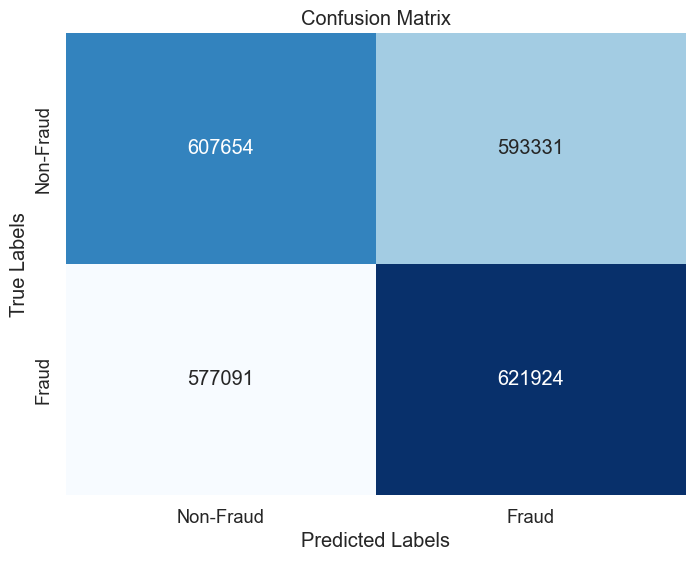

In [40]:
# Create a confusion matrix
cm = confusion_matrix(y_test, pred)

# Define class labels (assuming 0 represents non-fraud and 1 represents fraud)
class_labels = ['Non-Fraud', 'Fraud']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### LightGBM Feature Importance

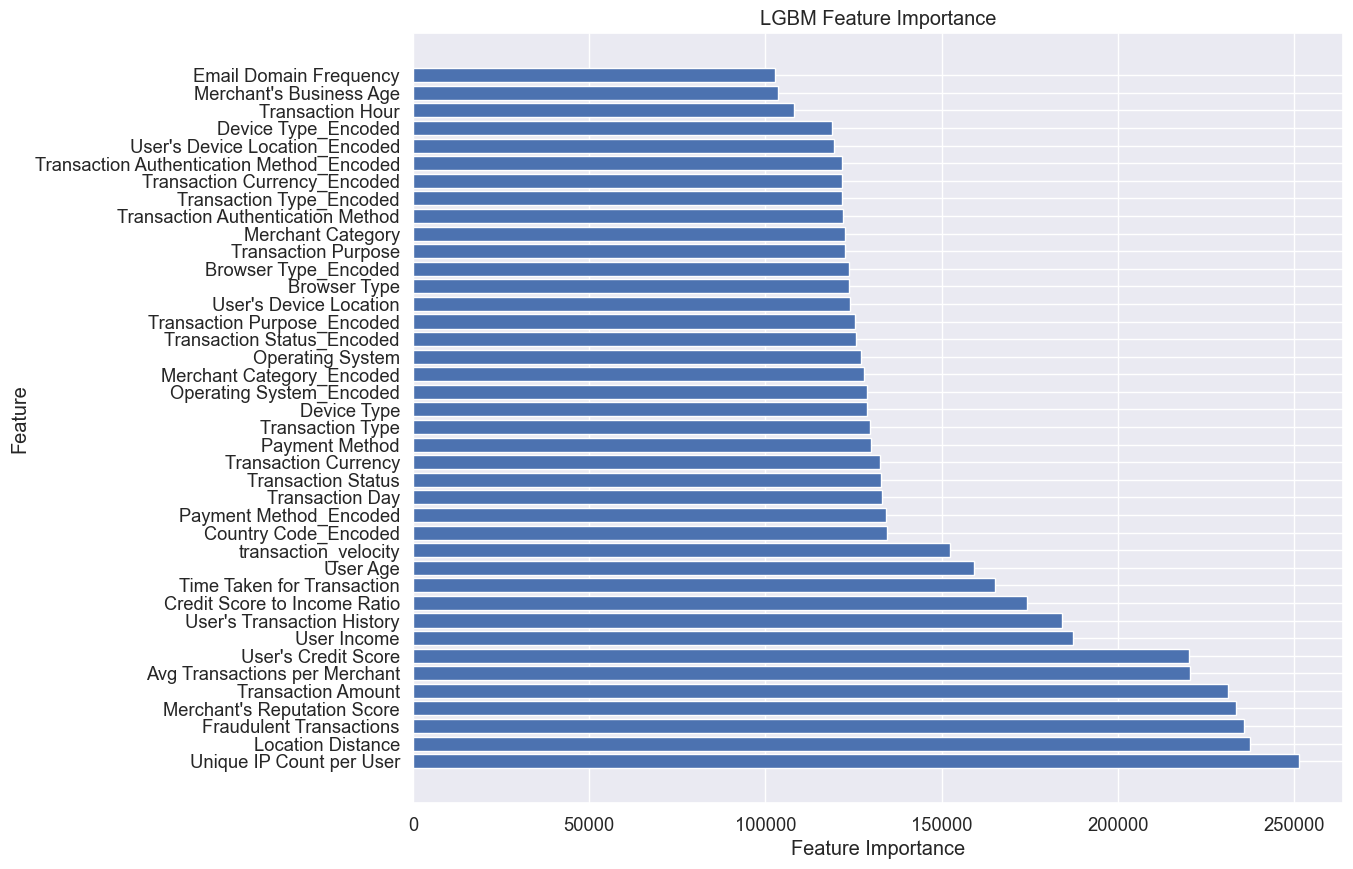

In [44]:
# Get feature importances from the trained model
feature_importances = lgb.feature_importances_

# Match feature importances with feature names/columns
feature_names = X.columns  # Replace X with your feature matrix

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importances_df['Importance'] = importances_df['Importance'] * 100

# Sort the features by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LGBM Feature Importance')
plt.show()

# Modelling with CatBoost

In [58]:
from catboost import CatBoostClassifier

# Initialize the CatBoostClassifier with suggested parameters
model = CatBoostClassifier(
    iterations=2000,          
    learning_rate=0.03,       
    depth=7,                  
    l2_leaf_reg=3,
    bagging_temperature=1.0,  
    border_count=128,         
    verbose=100,
    eval_metric='Accuracy',
    random_seed=42
)

# Train the CatBoost model
model.fit(X_train, y_train)

0:	learn: 0.5131261	total: 268ms	remaining: 8m 55s
100:	learn: 0.5157278	total: 21.1s	remaining: 6m 36s
200:	learn: 0.5166897	total: 43.7s	remaining: 6m 30s
300:	learn: 0.5178061	total: 1m 7s	remaining: 6m 19s
400:	learn: 0.5190236	total: 1m 31s	remaining: 6m 6s
500:	learn: 0.5202969	total: 1m 56s	remaining: 5m 49s
600:	learn: 0.5216750	total: 2m 22s	remaining: 5m 31s
700:	learn: 0.5232475	total: 2m 47s	remaining: 5m 10s
800:	learn: 0.5247078	total: 3m 13s	remaining: 4m 49s
900:	learn: 0.5261633	total: 3m 39s	remaining: 4m 28s
1000:	learn: 0.5276872	total: 4m 5s	remaining: 4m 5s
1100:	learn: 0.5292781	total: 4m 32s	remaining: 3m 42s
1200:	learn: 0.5306781	total: 4m 58s	remaining: 3m 18s
1300:	learn: 0.5321678	total: 5m 25s	remaining: 2m 54s
1400:	learn: 0.5336753	total: 5m 51s	remaining: 2m 30s
1500:	learn: 0.5350136	total: 6m 17s	remaining: 2m 5s
1600:	learn: 0.5364381	total: 6m 44s	remaining: 1m 40s
1700:	learn: 0.5378528	total: 7m 12s	remaining: 1m 15s
1800:	learn: 0.5392533	total: 

In [62]:
# Make predictions
y_pred = model.predict(X_test)

In [63]:
cat_acc = accuracy_score(y_pred, y_test)
print(cat_acc)

0.51431875


In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51   1182560
           1       0.52      0.51      0.52   1217440

    accuracy                           0.51   2400000
   macro avg       0.51      0.51      0.51   2400000
weighted avg       0.51      0.51      0.51   2400000



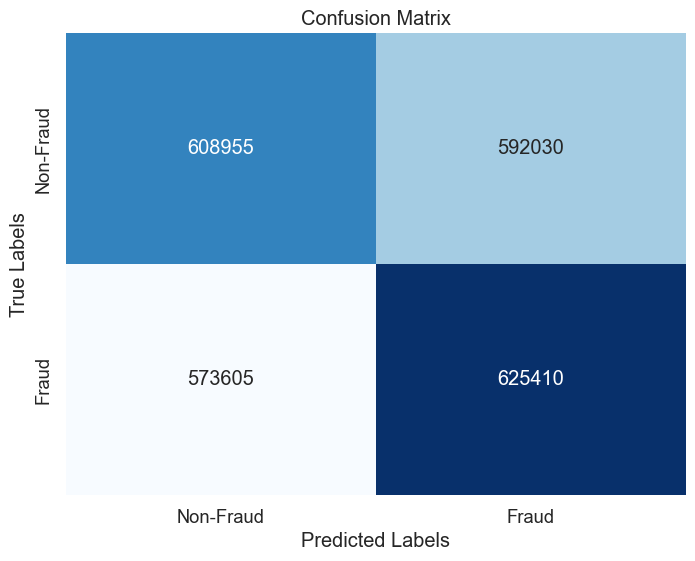

In [65]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (assuming 0 represents non-fraud and 1 represents fraud)
class_labels = ['Non-Fraud', 'Fraud']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### CatBoost Feature Importance

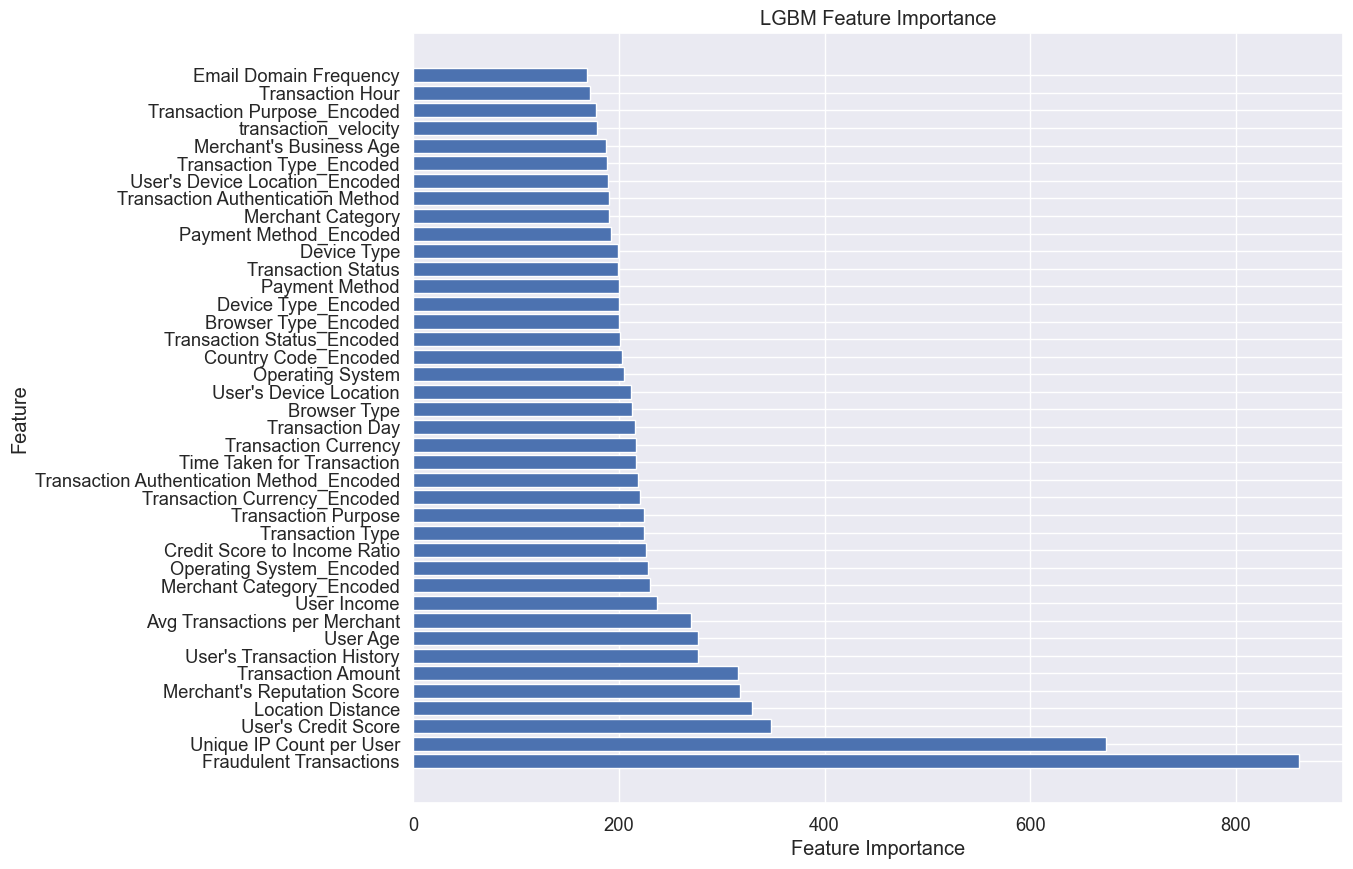

In [66]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Match feature importances with feature names/columns
feature_names = X.columns  # Replace X with your feature matrix

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importances_df['Importance'] = importances_df['Importance'] * 100

# Sort the features by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LGBM Feature Importance')
plt.show()